# Problema de registro de puntos 


In [1]:
using LinearAlgebra
using Pkg
Pkg.activate(".")
Pkg.instantiate()


  Activating new project at `~/Documents/GitHub/Tareaa`
   Installed IntelOpenMP_jll ───────── v2018.0.3+2
   Installed GR_jll ────────────────── v0.64.1+0
   Installed HypergeometricFunctions ─ v0.3.8
   Installed StatsFuns ─────────────── v0.9.16
   Installed FFTW ──────────────────── v1.4.6
   Installed OffsetArrays ──────────── v1.10.8
   Installed JSOSolvers ────────────── v0.7.6
   Installed Ratios ────────────────── v0.4.3
   Installed CaNNOLeS ──────────────── v0.5.3
   Installed MKL_jll ───────────────── v2022.0.0+0
   Installed TimeZones ─────────────── v1.7.2
   Installed AbstractFFTs ──────────── v1.1.0
   Installed MathOptInterface ──────── v1.1.1
   Installed KernelDensity ─────────── v0.6.3
   Installed FFTW_jll ──────────────── v3.3.10+0
   Installed StatsPlots ────────────── v0.14.33
   Installed DualNumbers ───────────── v0.6.8
   Installed MultivariateStats ─────── v0.9.1
   Installed DataValues ────────────── v0.4.13
   Installed Arpack_jll ────────────── v3.5.1+1
 

In [359]:
#####necesito recoger los puntos###
d=2; # dimension de los puntos
N=3; # la cantidad d puntos
X=[4 0;0 -1;1 0]'  #100*rand(2,N); Puntos que se quieren mover
Y=[0 0;0 2;-1 0]' #10*rand(2,N); #matriz de puntos objetivo-Fijos
R=rand(d,d); #rotation matrix


In [360]:
### construit los vectores de media, 
# matriz covarianza y vecotres de varianza
MX=zeros(1,2)
MY=zeros(1,2)

MX=1/N *sum(dims=d, X)';
MY=1/N *sum(dims=d, Y)'; #la media de los puntos
### las varianzas
VarX=1/N * sum(norm(X[:,i]'-MX,2)^2 for i in 1:N);
VarY=1/N * sum(norm(Y[:,i]'-MY,2)^2 for i in 1:N);
 using Statistics

CovXY=1/N * cov(Y',X'); #calcula la matriz de cov de X y Y
#obs que se transponen para hacer coincidir las dimensiones



    

In [361]:
H1=zeros(Float64,3,2)
H2=zeros(Float64,3,2)
for i in 1:N
    H1[i,:]=X[:,i]-MX'
    H2[i,:]=Y[:,i]-MY'
    
end
H=H1'*H2



2×2 Matrix{Float64}:
  0.666667  -3.33333
 -0.333333  -1.33333

In [362]:
E=svd(H)
u, s, v=E
R=v*u'


2×2 Matrix{Float64}:
  0.478852  -0.877896
 -0.877896  -0.478852

In [390]:
if  sign(det(u)*det(v'))==1
 
    R=v*u';
    print("eldeterminante de UV' es 1 y la matriz de Rotacion es R=$R")
else 
        

    pseudoI= Vector{Int64}(ones(d-1)) 
    push!(pseudoI,-1)
    S=diagm(0 => pseudoI)
    R=v*S*u';
    print("eldeterminante de UV' es -1 y la matriz de Rotacion es \n R=$R")
end


eldeterminante de UV' es -1 y la matriz de Rotacion es 
 R=[-0.21693045781865622 0.9761870601839528; -0.9761870601839528 -0.21693045781865639]

In [389]:
theta=acos(R[1,1])


1.7894652726688387

In [384]:


Rth(theta)=[cos(theta) -sin(theta); sin(theta) cos(theta)]
print("El ángulo de la rotación es :\n Theta=$theta")
traslation(theta)=MY'-Rth(theta)*MX'

El ángulo de la rotación es :
 Theta=1.7894652726688387

traslation (generic function with 1 method)

In [385]:
Rth(theta)


2×2 Matrix{Float64}:
 -0.21693   -0.976187
  0.976187  -0.21693

In [386]:
t=MY'-R*MX'

2×1 Matrix{Float64}:
 0.3536131164257446
 2.221334947700369

In [387]:
Rotado=R*X
for i in 1:N
Rotado[:,i]=Rotado[:,i]+t
end
Rotado

2×3 Matrix{Float64}:
 -0.514109  -0.622574  0.136683
 -1.68341    2.43827   1.24515

In [370]:
 Rota=Rth(0)*X

Y

2×3 adjoint(::Matrix{Int64}) with eltype Int64:
 0  0  -1
 0  2   0

In [393]:
for j in 0:0.8:theta
    Rota=Rth(j)*X
    for i in 1:N
        Rota[:,i]=Rota[:,i]+traslation(j)
    end
    scatter(Rota[1,:],Rota[2,:])
end

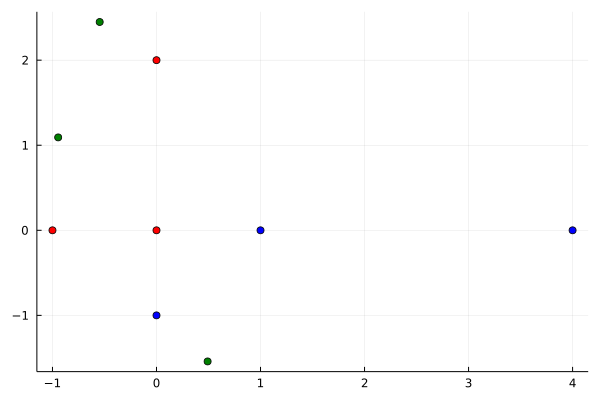

In [381]:
scatter(Y[1,:], Y[2,:], color="red", leg=false)
scatter!(Rotado[1,:], Rotado[2,:], color ="green" )
scatter!(X[1,:], X[2,:], color ="blue" )

In [4]:
using Pkg
Pkg.add("Plots")
using Plots


    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Qt5Base_jll ─ v5.15.3+1
    Updating `~/Documents/GitHub/Tareaa/Project.toml`
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+0 ⇒ v5.15.3+1
    Updating `~/Documents/GitHub/Tareaa/Manifest.toml`
  [ea2cea3b] ↑ Qt5Base_jll v5.15.3+0 ⇒ v5.15.3+1
Precompiling project...
  ✓ Qt5Base_jll
  ✗ GR_jll
  1 dependency successfully precompiled in 5 seconds (207 already precompiled)
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


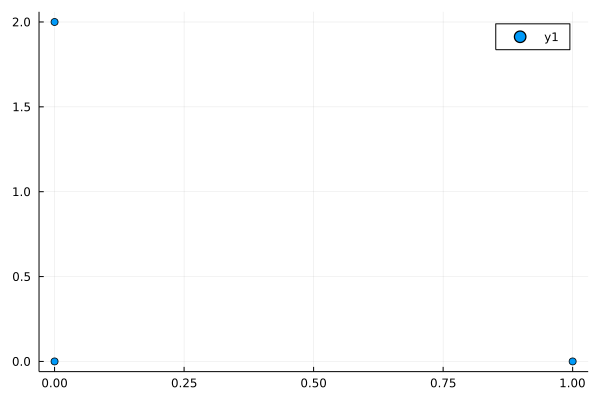

Your GR installation is incomplete. Rerunning build step for GR package.


┌ Info: Precompiling GR_jll [d2c73de3-f751-5644-a686-071e5b155ba9]
└ @ Base loading.jl:1423
ERROR: LoadError: InitError: could not load library "/Users/j1/.julia/artifacts/a0db4e704fd0da4298744f012883535d351fa170/lib/QtConcurrent.framework/Versions/5/QtConcurrent"
dlopen(/Users/j1/.julia/artifacts/a0db4e704fd0da4298744f012883535d351fa170/lib/QtConcurrent.framework/Versions/5/QtConcurrent.dylib, 1): image not found
Stacktrace:
  [1] dlopen(s::String, flags::UInt32; throw_error::Bool)
    @ Base.Libc.Libdl ./libdl.jl:117
  [2] dlopen(s::String, flags::UInt32)
    @ Base.Libc.Libdl ./libdl.jl:117
  [3] macro expansion
    @ ~/.julia/packages/JLLWrappers/QpMQW/src/products/library_generators.jl:54 [inlined]
  [4] __init__()
    @ Qt5Base_jll ~/.julia/packages/Qt5Base_jll/lpIK6/src/wrappers/x86_64-apple-darwin.jl:31
  [5] _include_from_serialized(path::String, depmods::Vector{Any})
    @ Base ./loading.jl:768
  [6] _require_search_from_serialized(pkg::Base.PkgId, sourcepath::String)
    @ B

In [5]:
scatter(X[1,:],X[2,:]) #graficando los puntos moviles

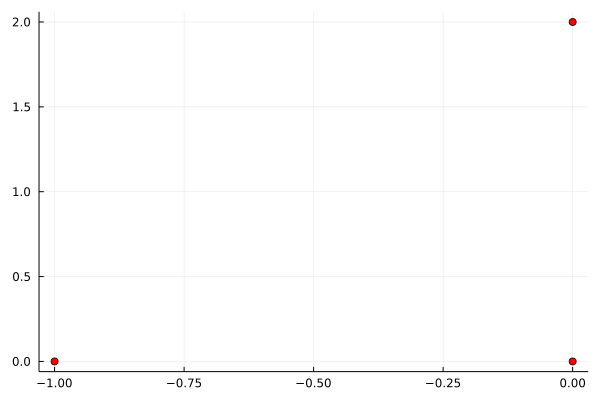

In [6]:
scatter(Y[1,:],Y[2,:], color="red", leg=false) #graficando los puntos fijos

In [7]:
####descomposicion SVD###
F=svd(CovXY) #usando funciones del paquete de LinearAL
u, s, v =F;
D=diagm(0 => s); # pasar el vector de valroes singulares a la diagonal principal

##construir la matriz de rotacion de acuerdo a las condiciones del lema y teorema
## del articulo de Umeyama.
if det(u)*det(v')==1
 
    RR=u*v';
    print("eldeterminante de UV' es 1 y la matriz de Rotacion es R=$RR")
else 
        

    pseudoI= Vector{Int64}(ones(d-1)) 
    push!(pseudoI,-1)
    S=diagm(0 => pseudoI)
    RR=u*S*v';
    print("eldeterminante de UV' es -1 y la matriz de Rotacion es \n R=$RR")
end

###calculemos c, y t


c=1/VarX * tr(D*S);

t= MY'-c.*RR* MX' #calulando la transformación
print( "\n La transdormación T = $t\n c=$c")
    


eldeterminante de UV' es -1 y la matriz de Rotacion es 
 R=[0.8320502943378436 0.554700196225229; -0.5547001962252289 0.8320502943378434]
 La transdormación T = [-0.5666666666666667; 0.5333333333333333;;]
 c=0.36055512754639896

$\epsilon^2 = \sigma_y^2-\frac{tr(DS)^2}{\sigma_x^2}$

In [8]:
#Claculo del error
error_cuadratico= VarY-  (tr(D*S)^2)/VarX

0.9666666666666667

In [9]:
####cgrafiquemos los puntos ###
YT=zeros(d,N)
for i in 1:N
     YT[:,i]= RR*X[:,i] + t # Aplicando los movimientos al conjunto de puntos
end





In [10]:
using Pkg
Pkg.add("StatsPlots")
Pkg.add("RDatasets")
using StatsPlots, RDatasets


   Resolving package versions...
  No Changes to `~/Documents/GitHub/Tareaa/Project.toml`
  No Changes to `~/Documents/GitHub/Tareaa/Manifest.toml`
Precompiling project...
  ✓ GR
  ✓ Plots
  ✓ StatsPlots
  3 dependencies successfully precompiled in 76 seconds (205 already precompiled, 1 skipped during auto due to previous errors)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions
   Resolving package versions...
  No Changes to `~/Documents/GitHub/Tareaa/Project.toml`
  No Changes to `~/Documents/GitHub/Tareaa/Manifest.toml`
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423
┌ Warning: Module Plots with build ID 170928444324417 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing 

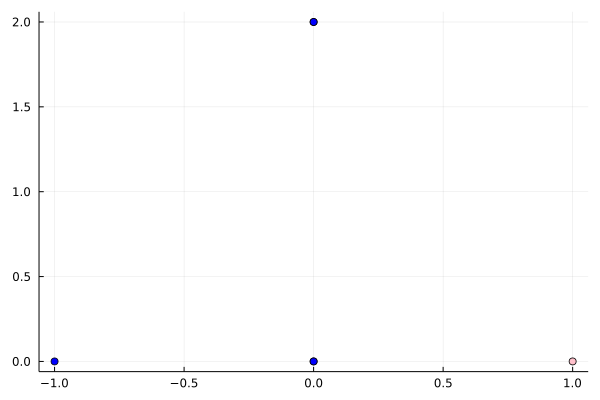

In [11]:
###graficando ando


#En azul tenemos los puntos fijos a los que nos queremos acercar
# EN rosadito tenemos los puntos a trasnformar 
#obs que solo se diferencial en un punto


scatter(X[1,:], X[2,:], color="pink") #puntos a mover
scatter!(Y[1,:], Y[2,:], color="blue", leg=false)#scatter(Y[1,:], color="red") #Puntos objetivo"



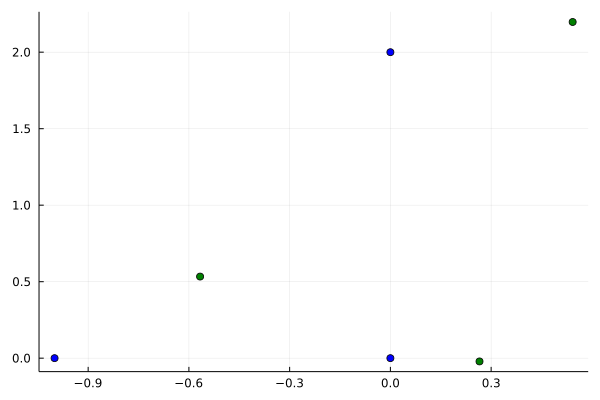

In [12]:
#En azul tenemos los puntos fijos a los que nos queremos acercar
# EN verde tenemos los puntos  transformados por nuestra matriz de rotación y la traslación.
scatter(Y[1,:], Y[2,:], color="blue", leg=false)#scatter(Y[1,:], color="red") #Puntos objetivo"
scatter!(YT[1,:],YT[2,:], color="green") #puntos transformados


Conclusiones: aunque mi matriz de rotación coincide con la del articulo; el vector de traslación, el coeficiente $c$ y el error cuadrado no lo hacen.